In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import glob
import json
import os
import numpy as np
import pandas as pd
from pathlib import Path
from evaluate import load

os.environ["HF_ALLOW_CODE_EVAL"] = "1"

from datasets import load_dataset
humaneval_dataset = load_dataset("openai_humaneval")["test"]


def estimate_duplicates(samples, num_selection, repeats=20, deduplicates=False):
    import random
    duplicates = []
    for _ in range(repeats):
        sampled_samples = random.sample(samples, num_selection)
        if deduplicates:
            duplicates.append(len(set(sampled_samples)))
        else:
            duplicates.append(len(sampled_samples) - len(set(sampled_samples)))
    return sum(duplicates) / len(duplicates)

2024-02-12 12:10:36.183512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
files = glob.glob("../influence_cache/lissa*final.json")
#files = sorted(files, key=lambda x: int(Path(x).stem.split("_")[1]))
files = sorted(files, key=lambda x: int(Path(x).stem.split("_")[2]))
influence_data = dict()
for f in files:
    influence = json.load(Path(f).open("r"))
    influence_data[Path(f).stem.replace("_cache_final", "")] = influence
influence_data = pd.DataFrame.from_dict(influence_data)

In [3]:
influence_data.head()

,lissa_testquery_1_solution_0,lissa_testquery_1_solution_2,lissa_testquery_7_solution_3,lissa_testquery_7_solution_0,lissa_testquery_8_solution_15,lissa_testquery_8_solution_0,lissa_testquery_34_solution_2,lissa_testquery_34_solution_0,lissa_testquery_43_solution_0,lissa_testquery_43_solution_4
0,2.905726e-07,1.955777e-07,3.930181e-07,1.527369e-07,1.229346e-07,1.862645e-07,4.544854e-07,2.272427e-07,1.294538e-07,3.781170e-07
1,8.288771e-08,-4.307367e-08,-5.625188e-07,-3.222376e-07,8.090865e-09,-5.178154e-07,5.438924e-07,-4.051253e-08,-2.188608e-07,7.897615e-07
2,8.987263e-08,1.201406e-07,1.210719e-07,1.303852e-07,-3.743917e-07,-2.337620e-07,-4.842877e-08,-5.252659e-07,-8.672941e-09,-7.599592e-07
3,-1.462176e-07,4.516914e-08,-1.024455e-07,-4.802132e-10,1.178123e-07,-1.797453e-07,1.154840e-07,-9.313226e-08,-3.743917e-07,-2.905726e-07
4,-3.073364e-08,8.754432e-08,1.825392e-07,3.702007e-08,-7.264316e-08,2.179295e-07,1.545995e-07,-9.359792e-08,1.094304e-07,3.688037e-07


In [20]:
influence_data.describe()

,codecontest_testquery_2,codecontest_testquery_5,codecontest_testquery_7,codecontest_testquery_11,codecontest_testquery_19,codecontest_testquery_21,codecontest_testquery_25,codecontest_testquery_28,codecontest_testquery_29
count,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04
mean,1.803138e-08,7.847540e-08,2.075542e-08,3.321160e-08,3.775301e-08,6.883075e-08,1.151870e-08,2.915196e-08,7.106025e-08
std,8.408527e-07,1.960089e-06,3.062615e-07,5.689002e-07,4.514943e-07,1.903889e-06,1.969415e-07,7.994643e-07,6.923606e-07
min,-4.261732e-06,-9.536743e-06,-1.564622e-06,-5.394220e-06,-2.667308e-06,-9.596348e-06,-2.354383e-06,-4.351139e-06,-3.129244e-06
25%,-4.675239e-07,-1.013279e-06,-1.545995e-07,-2.961606e-07,-2.225861e-07,-1.013279e-06,-1.061708e-07,-3.948808e-07,-3.203750e-07
50%,-5.797483e-08,-1.033768e-07,-1.498847e-09,8.003553e-10,-6.286427e-09,-1.089647e-07,-5.064066e-09,-3.795139e-08,0.000000e+00
75%,3.892928e-07,8.977950e-07,1.611188e-07,3.147870e-07,2.440065e-07,9.015203e-07,1.103617e-07,3.427267e-07,3.632158e-07
max,1.001358e-05,3.015995e-05,3.769994e-06,8.583069e-06,6.079674e-06,2.765656e-05,2.577901e-06,1.478195e-05,1.192093e-05


In [4]:
influence_data.describe()

,lissa_testquery_1_solution_0,lissa_testquery_1_solution_2,lissa_testquery_7_solution_3,lissa_testquery_7_solution_0,lissa_testquery_8_solution_15,lissa_testquery_8_solution_0,lissa_testquery_34_solution_2,lissa_testquery_34_solution_0,lissa_testquery_43_solution_0,lissa_testquery_43_solution_4
count,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04,7.519700e+04
mean,1.808624e-08,1.017658e-08,2.891689e-08,1.539959e-08,2.143508e-08,9.690036e-09,2.534746e-08,1.278074e-08,5.083358e-09,3.105266e-08
std,2.181359e-07,3.086913e-07,2.995226e-07,2.717603e-07,2.955597e-07,2.816800e-07,3.428402e-07,2.844660e-07,2.655815e-07,5.895954e-07
min,-2.577901e-06,-8.761883e-06,-2.682209e-06,-3.218651e-06,-3.173947e-06,-3.933907e-06,-4.082918e-06,-3.665686e-06,-1.750886e-06,-4.589558e-06
25%,-1.029111e-07,-1.499429e-07,-1.406297e-07,-1.359731e-07,-1.434237e-07,-1.480803e-07,-1.676381e-07,-1.452863e-07,-1.462176e-07,-3.017485e-07
50%,1.402805e-08,2.735760e-09,1.944136e-08,6.111804e-09,9.371433e-09,2.852175e-09,9.546056e-09,3.725290e-09,-7.014023e-09,-3.579771e-09
75%,1.341105e-07,1.611188e-07,1.881272e-07,1.545995e-07,1.713634e-07,1.592562e-07,1.993030e-07,1.611188e-07,1.415610e-07,3.222376e-07
max,4.559755e-06,9.119511e-06,5.394220e-06,7.748604e-06,1.025200e-05,7.331371e-06,1.013279e-05,5.751848e-06,6.526709e-06,1.299381e-05


In [5]:
import pandas as pd

# Assuming influence_data is your dataframe with influence scores
variance = influence_data.var()
mean_influence = influence_data.mean()
skewness = influence_data.skew()
kurtosis = influence_data.kurtosis()

# Define thresholds
percentile = 10
variance_threshold = variance.quantile(percentile / 100)
mean_influence_threshold = mean_influence.quantile(percentile / 100)
skewness_threshold = skewness.quantile(percentile / 100)
kurtosis_threshold = kurtosis.quantile(percentile / 100)

# Filter queries based on thresholds
filtered_queries = influence_data.columns[(variance > variance_threshold) & 
                                         (mean_influence > mean_influence_threshold) & 
                                         (skewness > skewness_threshold)] 
print("filter queries:", filtered_queries)

# Compute correlation matrix for filtered queries
#corr_matrix = influence_data[filtered_queries].corr()
#
## Select queries with minimal correlation
#selected_queries = []
#for _ in range(5):
#    if not selected_queries:
#        # Select the first query based on highest variance
#        selected_query = variance[filtered_queries].idxmax()
#        selected_queries.append(selected_query)
#    else:
#        # Update correlation matrix to exclude already selected queries
#        updated_corr_matrix = corr_matrix.drop(index=selected_queries, columns=selected_queries, errors='ignore')
#        # Find the query with the lowest average correlation with already selected queries
#        avg_corr = updated_corr_matrix.mean()
#        next_query = avg_corr.idxmin()
#        if next_query not in selected_queries:
#            selected_queries.append(next_query)
#
## Output selected queries
#print("Selected Queries:", selected_queries)
#

filter queries: Index(['lissa_testquery_43_solution_4'], dtype='object')


In [8]:
influence_data.columns

Index(['lissa_testquery_1_solution_0', 'lissa_testquery_1_solution_2',
       'lissa_testquery_7_solution_3', 'lissa_testquery_7_solution_0',
       'lissa_testquery_8_solution_15', 'lissa_testquery_8_solution_0',
       'lissa_testquery_34_solution_2', 'lissa_testquery_34_solution_0',
       'lissa_testquery_43_solution_0', 'lissa_testquery_43_solution_4'],
      dtype='object')

In [14]:
#selected_queries = pd.Index(
#    [
#     #'codecontest_testquery_2',
#     #'codecontest_testquery_5',
#     'codecontest_testquery_7',
#     #'codecontest_testquery_11',
#     'codecontest_testquery_25',
#     'codecontest_testquery_28',
#     'codecontest_testquery_29',
#     ]
#)
selected_queries = influence_data.columns
selected_queries = influence_data.columns[:6]

In [15]:
group_assignments = influence_data[selected_queries].idxmax(axis=1)
print(group_assignments.head())

0     lissa_testquery_7_solution_3
1     lissa_testquery_1_solution_0
2     lissa_testquery_7_solution_0
3    lissa_testquery_8_solution_15
4     lissa_testquery_8_solution_0
dtype: object


In [16]:
from collections import Counter

group_counts = Counter(group_assignments)

# Display the number of data points in each group
for group, count in group_counts.items():
    print(f"Group {group}: {count} data points")

Group lissa_testquery_7_solution_3: 15665 data points
Group lissa_testquery_1_solution_0: 10807 data points
Group lissa_testquery_7_solution_0: 13555 data points
Group lissa_testquery_8_solution_15: 11226 data points
Group lissa_testquery_8_solution_0: 11049 data points
Group lissa_testquery_1_solution_2: 12895 data points


In [50]:
import pandas as pd

# Assuming influence_data is your dataframe with influence scores
# And assuming each column is a test query with influence scores for each data point

# Define the size of each group
group_sizes = {group: count for group, count in group_counts.items()}
#{
#    'testquery_120': 23287,
#    'testquery_25': 21008,
#    'testquery_45': 23438,
#    #'testquery_30': 11010,
#    'testquery_85': 7464
#}

# Find candidates for reassignment to testquery_85
# Select top N influence scores from other groups for testquery_85
N = 6000  # Number of data points to consider for reassignment
threshold = 16000
#candidates = influence_data[['testquery_120', 'testquery_25', 'testquery_45', 'testquery_30']].nlargest(N, 'testquery_85').index
query_to_increase = "codecontest_testquery_7"
import copy
query_to_supply = [
    #"codecontest_testquery_5",
    #"codecontest_testquery_7",
    #"codecontest_testquery_11",
    #'codecontest_testquery_11',
    'codecontest_testquery_25',
    'codecontest_testquery_28',
    'codecontest_testquery_29',
]
candidates = influence_data.nlargest(N, query_to_increase).index

# Update group_sizes by reassigning some of these candidates to testquery_85
for candidate in candidates:
    # Find the primary group of the candidate
    #primary_group = influence_data.loc[candidate, ['testquery_120', 'testquery_25', 'testquery_45', 'testquery_30']].idxmax()

    primary_group = influence_data.loc[
        candidate, 
        query_to_supply].idxmax()
    
    # Check if the candidate can be moved without depleting other groups
    if group_sizes[primary_group] > threshold:  # Threshold to prevent depleting groups
        group_sizes[primary_group] -= 1
        group_sizes[query_to_increase] += 1
        group_assignments[candidate] = query_to_increase
        if group_sizes[query_to_increase] >= threshold:  # Target size for testquery_85
            break

# Print updated group sizes
print("Updated Group Sizes:", group_sizes)

Updated Group Sizes: {'codecontest_testquery_28': 18751, 'codecontest_testquery_25': 24069, 'codecontest_testquery_7': 14000, 'codecontest_testquery_29': 18377}


In [51]:
group_counts = Counter(group_assignments)

# Display the number of data points in each group
for group, count in group_counts.items():
    print(f"Group {group}: {count} data points")

Group codecontest_testquery_28: 18763 data points
Group codecontest_testquery_25: 24069 data points
Group codecontest_testquery_7: 13970 data points
Group codecontest_testquery_29: 18395 data points


In [17]:
from datasets import load_dataset

# Load the dataset
training_data = load_dataset("ise-uiuc/Magicoder-OSS-Instruct-75K")
group_labels = {
    'testquery_120': 4,
    'testquery_25': 0,
    'testquery_45': 2,
    'testquery_30': 1,
    'testquery_85': 3
}
group_labels = {
    'testquery_120': 3,
    'testquery_25': 0,
    'testquery_45': 1,
    'testquery_85': 2,
}
group_labels = {
    #'codecontest_testquery_2': 0,
    #'codecontest_testquery_5': 1,
    #'codecontest_testquery_7': 2,
    #'codecontest_testquery_11': 3,
    #'codecontest_testquery_28': 4,
    'codecontest_testquery_7': 0,
    'codecontest_testquery_11': 1,
    'codecontest_testquery_25': 2,
    'codecontest_testquery_28': 3,
    'codecontest_testquery_29': 4,
}
group_labels = {k: v for k, v in zip(selected_queries.tolist(), range(len(selected_queries)))}

# Create split_labels based on group_assignments and group_sizes
split_labels = [group_labels.get(group_assignments.get(i, ""), "") for i in range(len(training_data['train']))]

# Add the split_label column
training_data['train'] = training_data['train'].add_column("split_labels", split_labels)

# Function to convert a dataset row to JSON
def row_to_json(row):
    return json.dumps({key: row[key] for key in row})

# Save updated dataset to JSONL file
save_name = f"../Magicoder-OSS-Instruct-75K-{len(selected_queries)}lissainfluences.jsonl"
with open(save_name, "w") as file:
    for row in training_data['train']:
        file.write(row_to_json(row) + "\n")

# Confirm file saved
f"Updated training data saved as '{save_name}'"

"Updated training data saved as '../Magicoder-OSS-Instruct-75K-6lissainfluences.jsonl'"

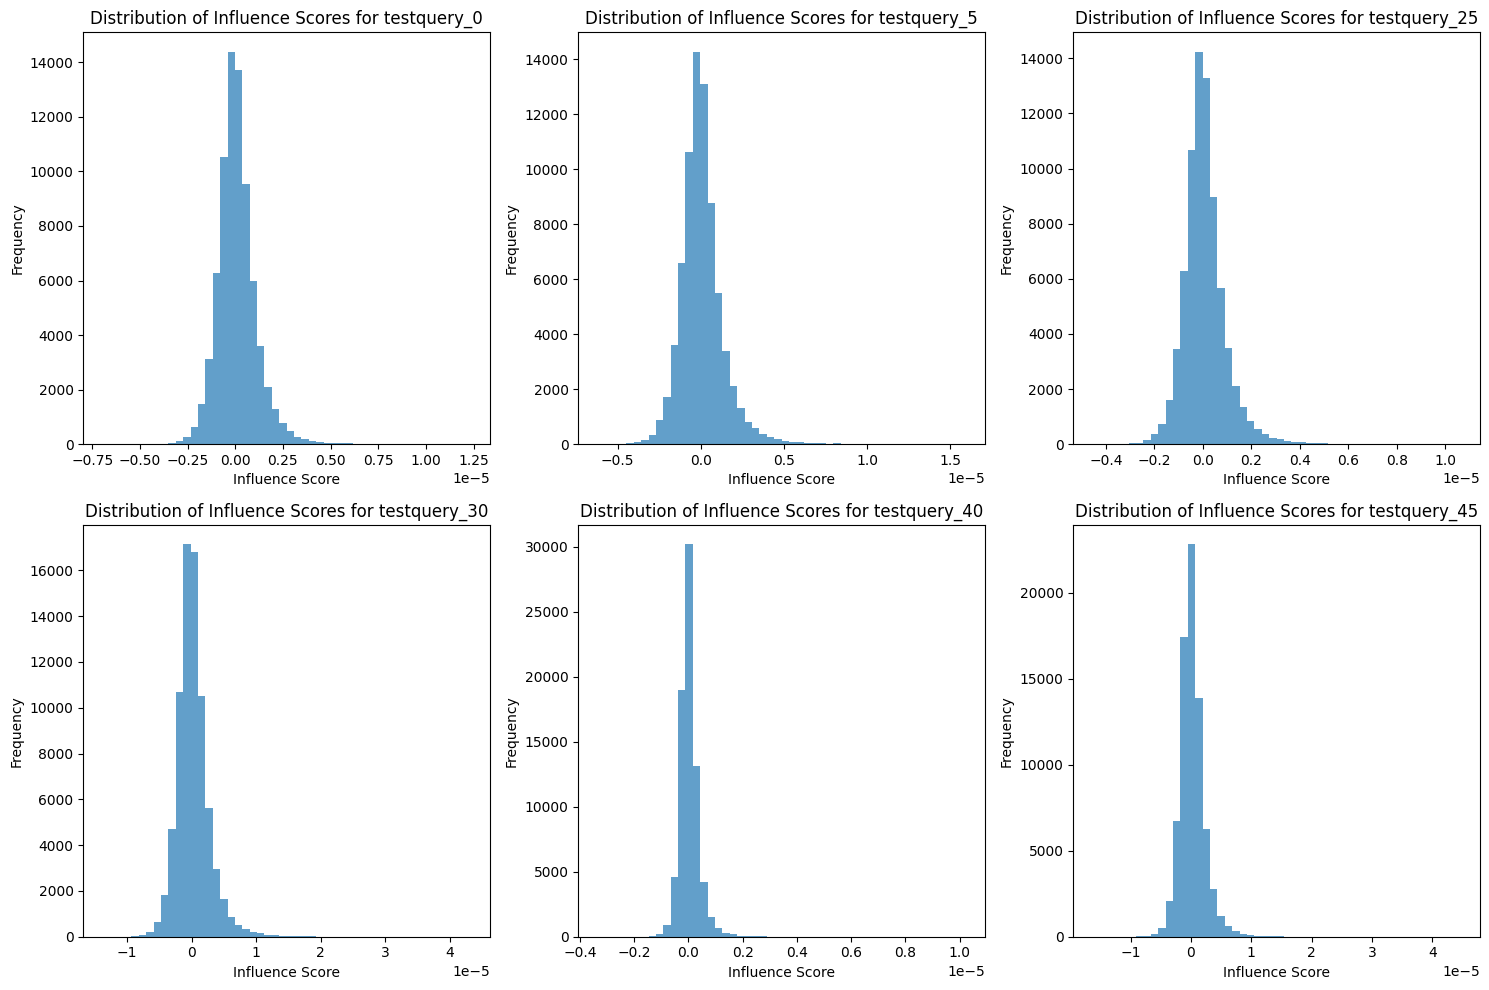

In [28]:
selected_queries = ['testquery_0', 'testquery_5', 'testquery_25', 'testquery_30', 'testquery_40', 'testquery_45']

# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Plotting each selected query
for i, query in enumerate(selected_queries, 1):
    plt.subplot(2, 3, i)  # Adjust the grid size based on the number of queries
    plt.hist(influence_data[query], bins=50, alpha=0.7)
    plt.title(f'Distribution of Influence Scores for {query}')
    plt.xlabel('Influence Score')
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Codecontest queries

In [3]:
from datasets import load_dataset

test_dataset = load_dataset("deepmind/code_contests", split="test")

Resolving data files:   0%|          | 0/39 [00:00<?, ?it/s]

In [4]:
test_dataset["public_tests"]

[{'input': ['5 2\nAA\nAB\nBB\nBA\nAZ\n'], 'output': ['5 2 1 3 4 \n']},
 {'input': ['8 4\n-3 1\n-4 4\n1 5\n2 2\n2 -2\n-2 -4\n-1 -1\n-6 0\n',
   '1 1\n0 0\n'],
  'output': ['3.162277660\n', '0.000000000\n']},
 {'input': ['5 1 5\n1 2 3 4 3\n', '5 1 5\n1 2 3 4 5\n', '5 4 5\n1 2 3 4 5\n'],
  'output': ['4\n', '5\n', '125\n']},
 {'input': ['0\n', '_XX\n', '_00\n', '0_25\n', '25\n'],
  'output': ['1\n', '9\n', '9\n', '0\n', '1\n']},
 {'input': ['5 0\n1 3 2 6 4\n1 2 1\n1 4 0\n3 2 1\n2 5 0\n',
   '3 1\n1 1 1\n1 2 1\n3 2 0\n'],
  'output': ['45', '10']},
 {'input': ['10 9\n-1 0 -1 1 1 2 2 3 3 3\n',
   '3 3\n-1 -1 -1\n',
   '2 2\n0 -1\n',
   '3 3\n0 1 1\n',
   '2 2\n0 1\n'],
  'output': ['652419213\n', '11\n', '1\n', '12\n', '2\n']},
 {'input': ['5\n3 6 2 1 4\n'], 'output': ['77\n']},
 {'input': ['9 3\n100101011\n101\n'], 'output': ['1 1 0 1 6 -1 -1 -1 \n']},
 {'input': ['6 4\n10 -9 2 -1 4 -6\n1 5\n5 4\n5 6\n6 2\n6 3\n2 1 2\n1 1 -3\n2 1 2\n2 3 3\n'],
  'output': ['39\n32\n0\n']},
 {'input': ['5 5

In [5]:
def filter_python_solutions(examples):
    solutions = []
    description = []
    lengths = []
    tests = []
    for sol,  desc, diff, tt in zip(examples["solutions"], examples["description"], examples["difficulty"], examples["public_tests"]):
        current_solution = []
        for lang, candidate_solution in zip(sol["language"], sol["solution"]):
            if lang == 3:
                current_solution.append(candidate_solution)
        if diff < 8 and current_solution:
            solutions.append(current_solution)
            description.append(desc)
            lengths.append(len(current_solution))
            tests.append(tt)
    return {"problem": description, "python_solutions": solutions, "solution_lengths": lengths, "assertation": tests}

In [6]:
dataset = test_dataset.map(
    filter_python_solutions,
    batched=True,
    batch_size=3000,
    num_proc=32,
    remove_columns=test_dataset.column_names,
    load_from_cache_file=False,
    desc="Running Encoding",
)

Running Encoding (num_proc=32):   0%|          | 0/165 [00:00<?, ? examples/s]

In [25]:
dataset

Dataset({
    features: ['problem', 'python_solutions', 'solution_lengths', 'assertation'],
    num_rows: 23
})

In [76]:
print(dataset["problem"][12])

You are given a string s of length n consisting of characters a and/or b.

Let \operatorname{AB}(s) be the number of occurrences of string ab in s as a substring. Analogically, \operatorname{BA}(s) is the number of occurrences of ba in s as a substring.

In one step, you can choose any index i and replace s_i with character a or b.

What is the minimum number of steps you need to make to achieve \operatorname{AB}(s) = \operatorname{BA}(s)?

Reminder:

The number of occurrences of string d in s as substring is the number of indices i (1 ≤ i ≤ |s| - |d| + 1) such that substring s_i s_{i + 1} ... s_{i + |d| - 1} is equal to d. For example, \operatorname{AB}(aabbbabaa) = 2 since there are two indices i: i = 2 where aabbbabaa and i = 6 where aabbbabaa.

Input

Each test contains multiple test cases. The first line contains the number of test cases t (1 ≤ t ≤ 1000). Description of the test cases follows.

The first and only line of each test case contains a single string s (1 ≤ |s| ≤ 100, wh

In [54]:
problem_index = 12
solution_indices = [1, 2, 5, 7, 9, 11, 28, 29]

129

In [77]:
dataset[12]["assertation"]

{'input': ['4\nb\naabbbabaa\nabbb\nabbaab\n'],
 'output': ['b\naabbbabaa\nbbbb\nbbbaab\n']}

In [11]:
print(dataset[12]["python_solutions"][19])

    #from _typeshed import SupportsKeysAndGetItem
import sys
from collections import deque
import heapq
import bisect
import copy
# sys.stdin=open("input.txt","r");
# sys.stdout=open("output.txt","w")
####### GLOBAL ###############
MOD=1000000007
NO=lambda:print("NO")
YES=lambda:print("YES")
_1=lambda:print(-1)
ari=lambda:[int(_) for _ in input().split()]
cin=lambda:int(input())
cis=lambda:input()
show=lambda x: print(x)
fast= lambda:sys.stdin.readline()

########### END #########
######
test_case=1
test_case=int(input())
######
sys.setrecursionlimit(10**6)
    
def ans():
    s=cis()
    abcount=0
    bacount=0
    n=len(s)
    s=list(s)
    def bruteforce(news):
        abcount=0
        nonlocal n
        bacount=0
        for i in range(n-1):
            if s[i]=="a" and s[i+1]=="b":
                abcount+=1
            if s[i]=="b" and s[i+1]=="a":
                bacount+=1
        # print(abcount,bacount)
        if abcount==bacount:
            return "".join(news)
        re